# CC 3230( AI  and Machine Learning Lab.)
Date:- 31.01.2022( 9:00- 10:30 AM)
Week-2
Technique: Hill Climbing 
Problem: TSP

Name: Ananya Agrawal

Registration Number: 199303010

#### Title: CC3230 A-1(Apply Hill Climbing Heuristic Search on TSP)

Submission Date: 12/02/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### About Hill Climbing:

Hill Climbing is a local heuristic seach technique used for mathematical optimization problems in Artificial Intelligence.

- It continuously moves in the direction of increasing elevation in order to find the peak of the mountain or the best solution to the optimization problem.

- The most common example of Hill Climbing Algorithm is the Travelling Salesperson Problem where distance to be travelled by the salesman has to be minimized.

- It is also called greedy local search as it only looks at its immediate neighbour states to find the best solution.

- Hill Climbing is susceptible to 3 Problems:
  1. **Local Maximum**: A local maximum is a peak state in the landscape which is better than each of its neighboring states, but there is another state also present which is higher than the local maximum.
  - *Solution*: Backtracking technique can be a solution of the local maximum in state space landscape. Create a list of the promising path so that the algorithm can backtrack the search space and explore other paths as well.
  2. **Plateau**: A plateau is the flat area of the search space in which all the neighbor states of the current state contains the same value, because of this algorithm does not find any best direction to move. A hill-climbing search might be lost in the plateau area.
  - *Solution*: The solution for the plateau is to take big steps or very little steps while searching, to solve the problem. Randomly select a state which is far away from the current state so it is possible that the algorithm could find non-plateau region.
  3. **Ridges**: A ridge is a special form of the local maximum. It has an area which is higher than its surrounding areas, but itself has a slope, and cannot be reached in a single move.
  - *Solution*: With the use of bidirectional search, or by moving in different directions, we can improve this problem.


### Travelling Salesperson Problem

In TSP, we have a salesperson who needs to visit a number of cities exactly once, after which he has to return to the city he started with.

The distances between each pair of cities are known, and the problem is to find the shortest route possible.

As there are a large set of possible solutions/routes to a specific Travelling Salesperson Problem, the goal is to find the optimal solution that will give the shortest path.



### Procedure

1. Using the Hill Climbing Algorithm, we will try to find the best solution to this problem by starting with generating a random solution, and then generate neighbours that would be other solutions only differing slightly from the current one.

2. If the best of those neighbours is shorter than the current solution, it replaces the current solution with this better solution.

3. Then it repeats the pattern by again creating neighbours.

4. If at some point, no neighbour is better than the current solution, it returns the then current solution. 

In [ ]:
##Import Libraries
import random
import numpy as np
import networkx as nx

#### Instantiation

Instantiation of list of cities, where each city has information about the distances from that city to other cities.

In [ ]:
#coordinate of the points/cities
#coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7], 
                       #[15,20], [10,9], [12,12], [46,17], [60,55], [100,80], [16,13]])
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50]])

The distance from each city to itself will be ZERO and the distance to and from a city A and another city B will be the same.

This will give us an adjacency matrix containing n cities and n distances between each pair of cities.

In [ ]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :       
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

In [ ]:
matrix = generate_matrix(coordinate)
print(matrix)

[[ 0.         34.66987165 58.87274412 17.4642492  51.623638  ]
 [34.66987165  0.         26.07680962 22.20360331 30.6757233 ]
 [58.87274412 26.07680962  0.         48.25971405 45.        ]
 [17.4642492  22.20360331 48.25971405  0.         34.17601498]
 [51.623638   30.6757233  45.         34.17601498  0.        ]]


#### Random Solution Generator

For Hill climbing to work, it has to start with a random solution to our Travelling salesman problem.

Here, a solution to the Travelling salesman problem could simply be a list of identifiers of all cities, in the order the salesman should visit them. Each city has to be visited exactly once.

Therefore,
1. Create a list of identifiers of all cities, and from there on iteratively pick a city from that list at random and add it to the solution.

2. The range() function will create a range of all numbers from 0 to the given argument which is the length of the problem containing 1 entry per city.

3. Every city can only be visited once, after its identifier is added to our solution we then remove that city’s identifier from the city identifier list.

4. Here, the *import random* helps to create a random solution.


In [ ]:
#finds a random solution    
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)

    return solution

In [ ]:
random_sol = solution(matrix)#prints coordinates of random solution
print(random_sol)

[1, 0, 3, 2, 4]


#### Calculate Length of the Route

Since we want our Hill climber to find the shortest solution, we need a function calculating the length of a specific solution.

As, a solution is a list of all cities in a specific order, we can do so by iterating over a solution and use the matrix argument to add the distance to each new city to our total cycle length. 

- The iterator i “visits” each city, so i-1 is “at” the previous city or the last city when i equals 0.
- solution[i] thus gives us the current city, and solution[i-1] gives us the previous one. 
- Then we simply use the matrix to get the distance between these cities, which we add to the total length of the route (cycle_length).


In [ ]:
#computes the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

In [ ]:
random_pathlen = path_length(matrix, random_sol)
print(random_pathlen)

176.06955819170298


#### Generating all Neighbours of a Solution

Hill climbing works in part by generating all neighbouring solutions to the current solution.

A neighbouring solution is a solution that’s only slightly different from the current solution.

a neighbour still needs to be a correct solution: every city still needs to be visited exactly once.

We can accomplish both by creating a neighbour as follows: copy the current solution, and then make two cities swap places!

Since we want to create all neighbours to a solution, and need to make cities swap places, we need to create two for loops, one nested in the other, both iterating the current solution.

Since swapping city A with city B is the same as swapping city B with city A, our second loop needs to only loop over those cities the first loop hasn’t looped over yet. Inside the second loop, we create our neighbour with the swapped cities and add it to our neighbours list.

In [ ]:
#generate neighbors of the random solution by swapping cities and returns the neighbor
def get_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    return neighbors

In [ ]:
test=solution(matrix)
print(test)
print(get_neighbors(test))

[4, 2, 0, 3, 1]
[[2, 4, 0, 3, 1], [0, 2, 4, 3, 1], [3, 2, 0, 4, 1], [1, 2, 0, 3, 4], [4, 0, 2, 3, 1], [4, 3, 0, 2, 1], [4, 1, 0, 3, 2], [4, 2, 3, 0, 1], [4, 2, 1, 3, 0], [4, 2, 0, 1, 3]]


#### Find Best Neighbor

It first sets the bestNeighbor to the first neighbor in the list of neighbors (and best_path to its path_length), and then iterates over all neighbors.

When a neighbor has a shorter route length, both best_neighbor and best_path are updated.


In [ ]:
#returns the best neighbor
def get_best_neighbor(matrix, neighbors):
            
    #assume that the first neighbor in the list is the best neighbor      
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)
    
    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path

In [ ]:
matrix = generate_matrix(coordinate)
print(get_best_neighbor(matrix,get_neighbors(solution(matrix))))

([2, 4, 3, 0, 1], 157.38694544537313)


#### Hill Climbing Algorithm

As long as the best neighbor is better than the current solution, we repeat the same pattern with the current solution each time being updated with the best neighbor. When this process stops, we return the current solution (and its current path length).

In [ ]:
def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbors = get_neighbors(current_solution)
    best_neighbor, best_neighbor_path = get_best_neighbor(matrix, neighbors)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = get_neighbors(current_solution)
        best_neighbor, best_neighbor_path = get_best_neighbor(matrix, neighbor)

    return current_path, current_solution

The solution is 
 [1, 2, 4, 3, 0] 
The path length is 
 157.38694544537313


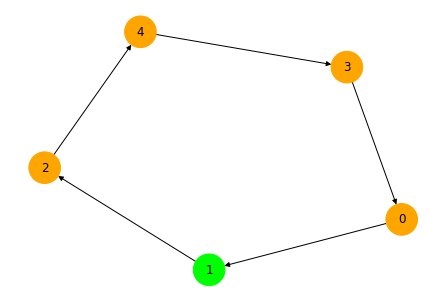

In [ ]:
def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])
    
    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == final_solution[1][0]:
            color_map.append('lime')
        else: 
            color_map.append('orange')
    nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])
    return final_solution
    
fin_sol = graph(coordinate)
optimal_sol = fin_sol[1]
optimal_pathlen = fin_sol[0]

### Result

##### Assignment: 

Comparison of random solution with optimal solution and their respective path lengths.

In [ ]:
print("The random solution is " + str(random_sol))
print("The random path length is " + str(random_pathlen))
print("The optimal solution is " + str(optimal_sol))
print("The optimal path length is " + str(optimal_pathlen))

The random solution is [1, 0, 3, 2, 4]
The random path length is 176.06955819170298
The optimal solution is [1, 2, 4, 3, 0]
The optimal path length is 157.38694544537313


#### Remarks

By comparing Random Solution and Optimal Solution, it can be noted that the Hill Climbing algorithm always presents the same optimal solution compared to the random solution which gives us a different result everytime.

By noting this difference it is important to understand that in order to get a decent result using random solution approach, the quality of the result cannot be guaranteed. Hill Climbing on the other hand takes a structured approach and gives us a usable result every single time.

Here, in this example we considered 5 cities that had to be travelled by the salesperson, for which Hill Climbing Algorithm was able to provide an optimal solution considering it did not come across any of the problems it is susceptible to like, **Local Maxima**, **Plateau** and **Ridge**. However, if we had to consider 15 cities or more, we might run into a problem where Hill Climbing Algorithm would not be able to provide us the optimal path for traversal.

It should be noted that Hill Climbing solution might not be able to deliver an optimal solution everytime, yet, for any given use case, Hill Climbing can be considered as the better approach to use in problem solving when compared to Random Solution.